# Generador de códigos para MintWorkbench

Correr el cuaderno completo, requiere el archivo "DeltaLib.py" en la misma carpeta de este cuaderno

## Abrir cuadro de diálogo

revise que se abra un cuadro de diálogo, luego escoja la carpeta donde están las subcarpetas de cada estudiante

In [4]:
%reset -sf
import tkinter as tk
from tkinter import filedialog

from pathlib import Path


root = tk.Tk()
root.wm_attributes('-topmost', 1)
root.withdraw()

file_path = Path(filedialog.askdirectory())
print(file_path)
trayPath = file_path.joinpath("trayectorias")
trayPath.mkdir(parents=True, exist_ok=True)
print(trayPath)

C:\Users\000092114\UPB\Mecanismos 2024_20 - Submitted files
C:\Users\000092114\UPB\Mecanismos 2024_20 - Submitted files\trayectorias


## Generar archivos de trayectoria

Se generan archivos en una carpeta llamada "trayectorias" en la carpeta de trabajo de este cuaderno.

No encuentro archivo  .csv  para  .849C9593-D756-4E56-8D6E-42412F2A707B
No encuentro archivo  .csv  para  Emanuel Diaz Madera
No encuentro archivo  .csv  para  Jacobo Elias Villegas Arango
No encuentro archivo  .csv  para  Mariana Cano Suarez
No encuentro archivo  .csv  para  Sebastian Vergara Hernandez
No encuentro archivo  .csv  para  trayectorias
318  puntos procesados
318  puntos procesados
680  puntos procesados
680  puntos procesados
840  puntos procesados
840  puntos procesados
329  puntos procesados
329  puntos procesados
434  puntos procesados
434  puntos procesados
352  puntos procesados
352  puntos procesados
352  puntos procesados
352  puntos procesados
514  puntos procesados
514  puntos procesados
353  puntos procesados
353  puntos procesados


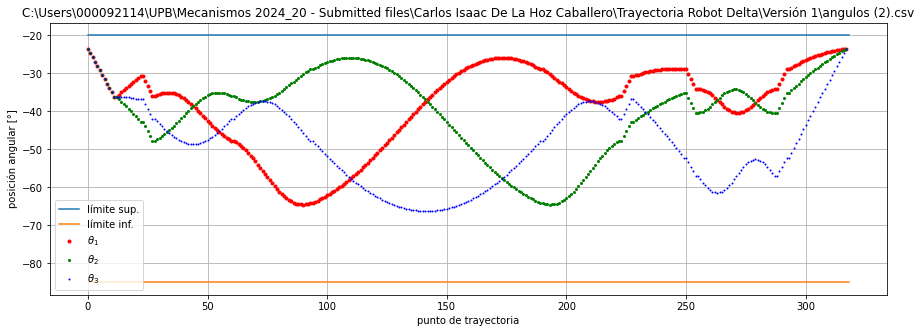

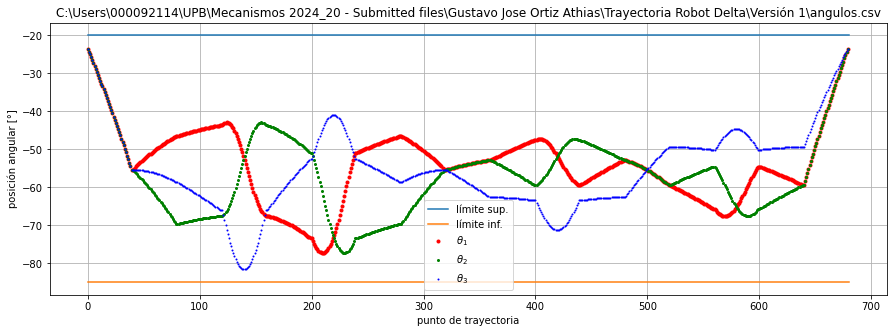

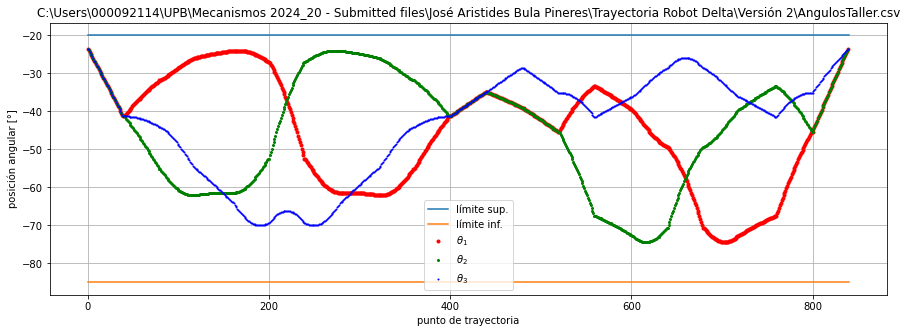

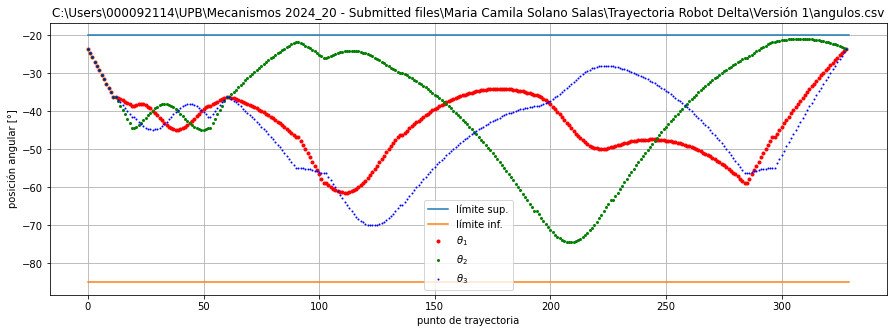

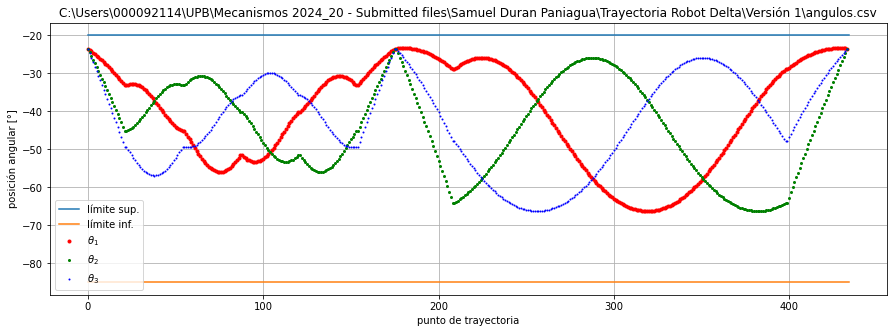

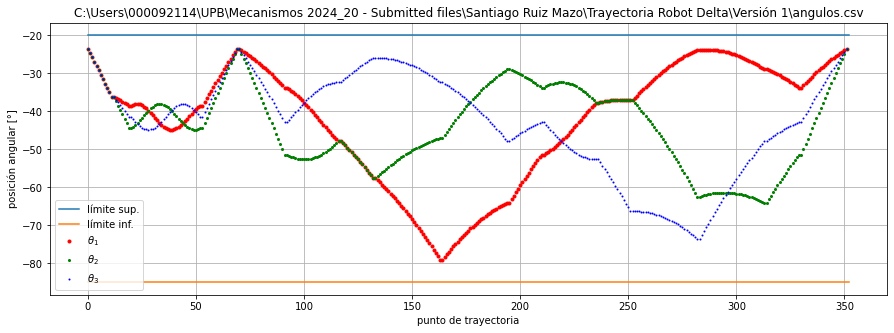

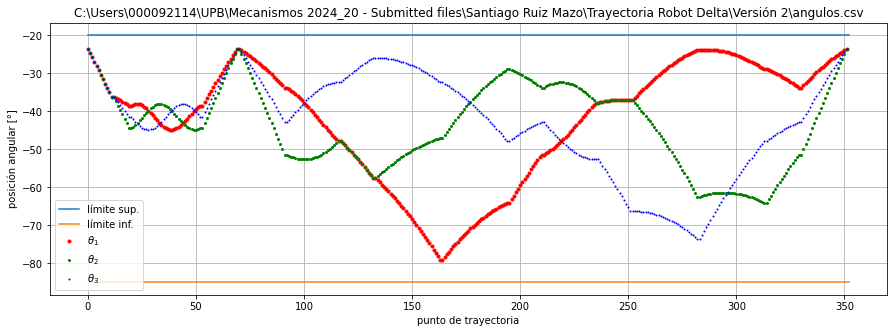

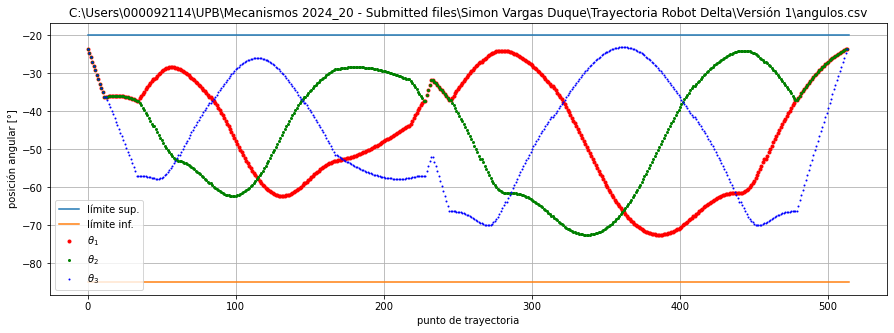

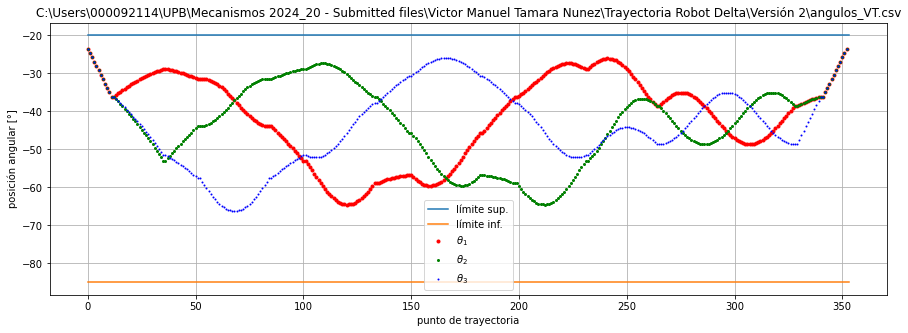

In [5]:
import os
from DeltaLib import genMintCode,revisarGraficas
import shutil
import csv
import matplotlib.pyplot as plt
import numpy as np

#obtiene los directorios con terminación de Aula Digital
def get_moodle_info(basepath,extension):
    '''basepath: (string o Path) ruta de la carpeta descomprimida desde aula digital
    extensions: extension a buscar(str) 
    '''
    pathList,nameList,scriptList = list(),list(),list()
    for entry in os.listdir(basepath):
        entry = Path(entry)
#         if str(entry).endswith("_assignsubmission_file_"):
        #agregue el path de la carpeta a la lista de paths
        pathList.append(basepath/entry)
        #agregue el nombre a la lista de nombres (extraido del nombre de la entrega)
        nameList.append(str(entry).split("_")[0])
        #recoja todos los archivos de cada entrega
        p = pathList[-1].glob("**/*")
        #solo guarde los que estén en la lista de extensiones (para evitar que coja los cuadernos)
        scriptList.append([x for x in p 
                           if x.is_file() and x.suffix == extension])
        if scriptList[-1] == []: # Eliminar elementos vacíos
            print("No encuentro archivo ",extension," para ",nameList[-1])
            scriptList.pop(-1)
            nameList.pop(-1)
            pathList.pop(-1)
    return pathList,nameList,scriptList
#     return [name for name in os.listdir(a_dir)
#             if os.path.isdir(os.path.join(a_dir, name))]

paths,names,paths_csv = get_moodle_info(file_path,".csv")
# print(paths_csv)

for i,nombre in enumerate(names):
    for j,path_csv in enumerate(paths_csv[i]):
        revisarGraficas(path_csv)
        genMintCode(path_csv,125,1)
        codigo = Path(genMintCode(path_csv,125,1))
        nuevoCodigo = Path(nombre + ".txt")
        try:
            shutil.copyfile(codigo, trayPath/nuevoCodigo)
        except Exception as e:
            print(relPath," no entrega .csv", " o Error: ",e)

# for relPath in get_immediate_subdirectories(file_path,):
#     pathStr = Path(file_path/relPath/"angulos.csv")
#     print(pathStr)
#     genMintCode(pathStr,125,1)
#     try:
#         shutil.copyfile(file_path + "/" + relPath + "/solution.txt", file_path + "/trayectorias/" + relPath + '.txt')
#     except Exception as e:
#         print(relPath," no entrega .csv", " o Error: ",e)

In [10]:
file_path = filedialog.askopenfilename()


if file_path != "":
    print(file_path)
else:
    print("Archivo no válido")
    
import cv2 
import sys 
import numpy as np

infile = file_path
outfile = Path(file_path)
outfile = outfile.stem + "_trayectoria" + outfile.suffix
fps = 30
size = (1280,720) # de acuerdo a la resolución del video


cap = cv2.VideoCapture(infile)
fourcc = cv2.VideoWriter_fourcc(*'H264')
vw = cv2.VideoWriter(outfile, fourcc, fps, size)
tmp = 0
print(cap.isOpened())
while cap.isOpened():
    ret,frame = cap.read()
    
    try:
        tmp = np.maximum(tmp, frame)
    except Exception as e:
        print(e)
        break
    vw.write(tmp)
    
cap.release()
vw.release()


Archivo no válido
False


In [11]:
print(outfile)

_trayectoria
